In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import glob
import matplotlib.pyplot as plt
import matplotlib
import re

In [2]:
fto = '/storage/experiments/2024/03_ISS_SPACEDOS03/AX2-MSPD-001_Shielded_0x42/15.TXT' #  File to Open

l=[]
l.extend(range(0,254))
df = pd.read_csv(fto, names=l, header=None, low_memory=False)
#df['time'] = df.index * (1/123)
#df = df[:-5]
#df[0] = df[0].astype(float)

In [3]:
df.loc[df[0]=='$DOS']
df
#df.loc[df[9]<8]#.loc[:,8:]
#df.loc[7965:]

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
0,$HIST,0,4275934991,1727,3,4963,54331,4442,30,10,...,0,0,0,0,0,0,0,0,0,0
1,$HIST,1,4275935008,1652,3,4932,54422,4451,25,7,...,0,0,0,0,0,0,0,0,0,0
2,$HIST,2,4275935024,1665,2,5101,54294,4415,24,9,...,0,0,0,0,0,0,0,0,0,0
3,$HIST,3,4275935040,1652,2,4170,54202,5438,39,6,...,0,0,0,0,0,0,0,0,0,0
4,$HIST,4,4275935056,1688,5,2225,54206,7309,49,12,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10996,$HIST,10996,4276113951,1718,0,2300,54330,7139,32,4,...,0,0,0,0,0,0,0,0,0,0
10997,$HIST,10997,4276113967,1685,1,2392,54429,6975,39,2,...,0,0,0,0,0,0,0,0,0,0
10998,$HIST,10998,4276113984,1613,1,2487,54499,6875,41,4,...,0,0,0,0,0,0,0,0,0,0
10999,$HIST,10999,4276114000,1668,0,2260,54344,7188,64,3,...,0,0,0,0,0,0,0,0,0,0


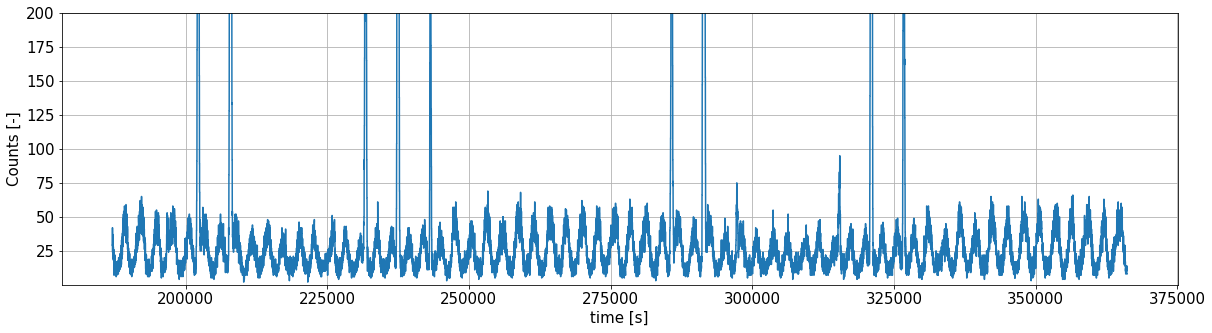

In [4]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

df = df.loc[df[0]=='$HIST'].copy()
df[2] = pd.to_numeric(df[2], errors='coerce')
df['sum'] = df.iloc[:,10:253].sum(axis=1)
df['mean'] = df['sum'].rolling(30).mean()

plt.plot(df[2]-4275747888,df['sum'], drawstyle='steps-mid')
#plt.plot(df['sum'], drawstyle='steps-mid')
#plt.plot(df['mean'], drawstyle='steps-mid')
#plt.xlim(39,58)
#plt.xlim(39,42)
plt.ylim(0.0016,200)
plt.xlabel('time [s]')
plt.ylabel('Counts [-]')
plt.grid()

In [5]:
fto = '/storage/experiments/2024/03_ISS_SPACEDOS03/AX2-MSPD-002_0x15/13.TXT' #  File to Open

l=[]
l.extend(range(0,254))
df2 = pd.read_csv(fto, names=l, header=None, low_memory=False)
#df['time'] = df.index * (1/123)
#df = df[:-5]
#df[0] = df[0].astype(float)

In [6]:
df2.loc[df2[0]=='$DOS']
df2
df2.loc[df2[9]>5]#.loc[:,8:]


,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
0,$HIST,0,4275761814,788,46,42742,21628,269,10,7,...,0,0,0,0,0,0,0,0,0,0
1,$HIST,1,4275761831,776,44,42383,22034,241,12,10,...,0,0,0,0,0,0,0,0,0,0
2,$HIST,2,4275761847,809,44,42942,21455,224,11,8,...,0,0,0,0,0,0,0,0,0,0
3,$HIST,3,4275761863,785,43,41953,22407,280,21,8,...,0,0,0,0,0,0,0,0,0,0
4,$HIST,4,4275761879,789,43,42470,21914,266,11,11,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10982,$HIST,10982,4275940169,797,37,42561,21850,244,12,7,...,0,0,0,0,0,0,0,0,0,0
10984,$HIST,10984,4275940202,789,42,42305,22104,250,18,6,...,0,0,0,0,0,0,0,0,0,0
10990,$HIST,10990,4275940302,790,60,43794,20643,220,5,9,...,0,0,0,0,0,0,0,0,0,0
10995,$HIST,10995,4275940384,815,50,43954,20504,189,6,6,...,0,0,0,0,0,0,0,0,0,0


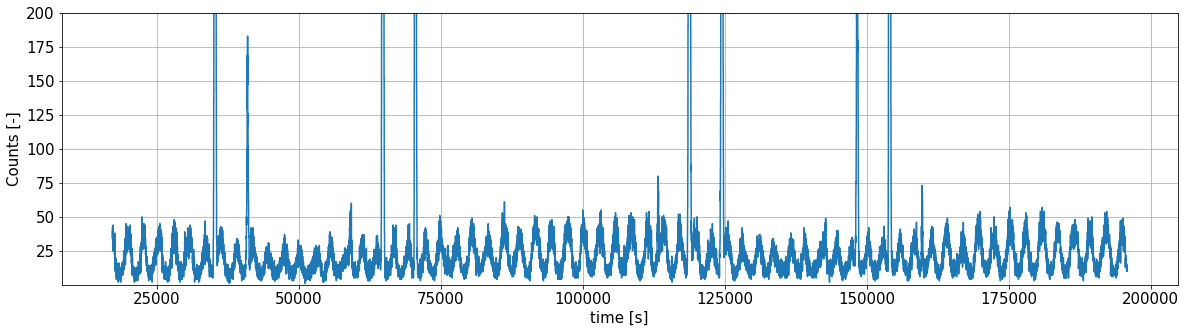

In [7]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

df2 = df2.loc[df2[0]=='$HIST'].copy()
df2[2] = pd.to_numeric(df2[2], errors='coerce')
df2['sum'] = df2.iloc[:,10:253].sum(axis=1)
df2['mean'] = df2['sum'].rolling(30).mean()

plt.plot(df2[2]-4275744648,df2['sum'], drawstyle='steps-mid')
#plt.plot(df2['sum'], drawstyle='steps-mid')
#plt.plot(df['mean'], drawstyle='steps-mid')
#plt.xlim(39,58)
#plt.xlim(39,42)
plt.ylim(0.0016,200)
plt.xlabel('time [s]')
plt.ylabel('Counts [-]')
plt.grid()

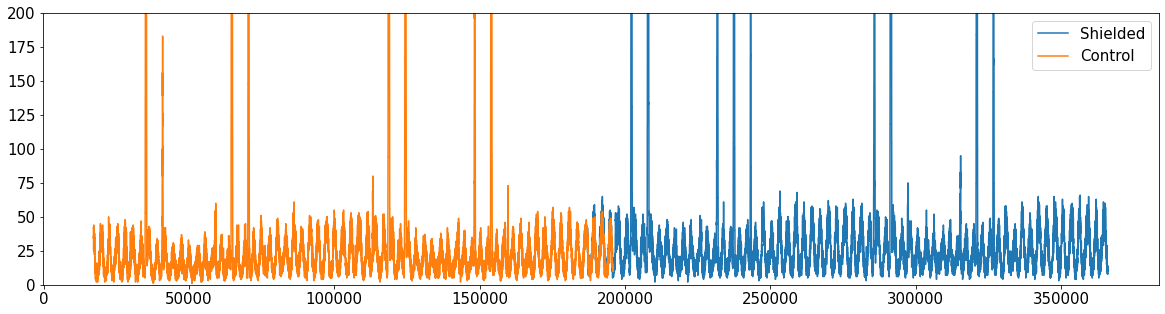

In [8]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(df[2]-4275747888,df['sum'], drawstyle='steps-mid', label='Shielded')
plt.plot(df2[2]-4275744648,df2['sum'], drawstyle='steps-mid', label='Control')
plt.ylim(0,200)

plt.legend(loc=1)

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

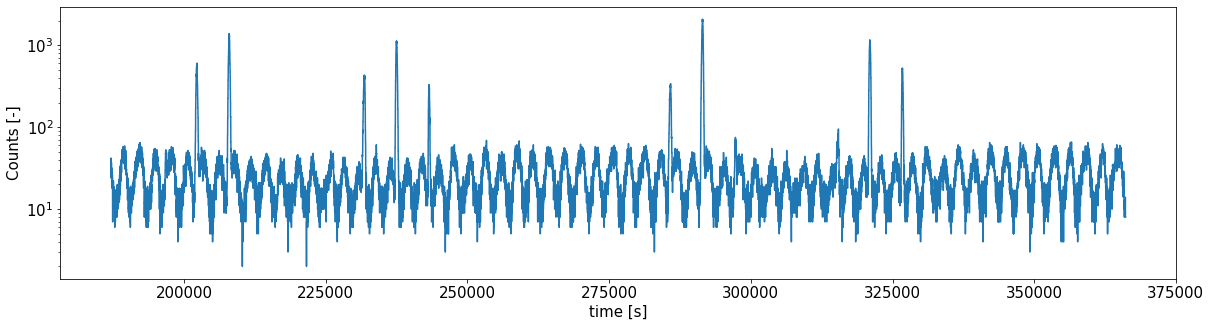

In [439]:
fto = '/storage/experiments/2024/03_ISS_SPACEDOS03/AX2-MSPD-001_Shielded_0x42/15.TXT' #  File to Open

l=[]
l.extend(range(0,254))
df = pd.read_csv(fto, names=l, header=None, low_memory=False)

plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

df = df.loc[df[0]=='$HIST'].copy()
df[2] = pd.to_numeric(df[2], errors='coerce')
df['sum'] = df.iloc[:,10:253].sum(axis=1)
df['mean'] = df['sum'].rolling(30).mean()

plt.plot(df[2]-4275747888,df['sum'], drawstyle='steps-mid')
plt.yscale('log')
plt.xlabel('time [s]')
plt.ylabel('Counts [-]')
plt.grid

(0.04, 200)

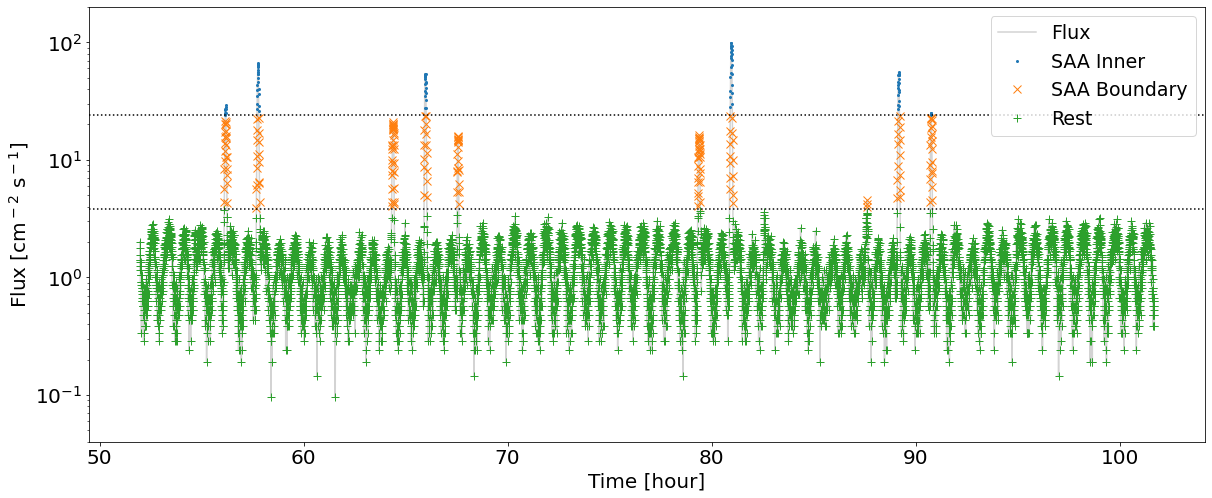

In [440]:
plt.figure(figsize=(20,8))
matplotlib.rcParams.update({'font.size': 20})

rcc = df.copy()
#rcc['time'] = pd.to_datetime(rcc.index * 11, unit='s')
rcc['time'] = (rcc[2]-4275747888) /60/60
rcc.set_index('time', inplace=True, drop=False)

plt.plot(rcc['sum']/10.4/2, c='lightgray', label='Flux')
plt.yscale('log')
plt.plot(rcc.loc[(rcc['sum']>500) & (rcc['sum']<10000)]['sum']/10.4/2, ms=4, marker='.', linestyle='', label='SAA Inner')
plt.plot(rcc.loc[(rcc['sum']>80) & (rcc['sum']<500)]['sum']/10.4/2, ms=8, marker='x', linestyle='', label='SAA Boundary')
plt.plot(rcc.loc[(rcc['sum']>0) & (rcc['sum']<80)]['sum']/10.4/2, ms=8, marker='+', linestyle='', label='Rest')

plt.axhline(y = 500/10.4/2, color = 'black', linestyle = ':')
plt.axhline(y = 80/10.4/2, color = 'black', linestyle = ':')
#plt.axhline(y = 13/10.4/2, color = 'black', linestyle = ':')
#plt.axhline(y = 10/10.4/2, color = 'black', linestyle = ':')

plt.legend(fontsize=19)

plt.xlabel('Time [hour]')
plt.ylabel(r'Flux [cm$^-$$^2$ s$^-$$^1$]')
#plt.xlim(21.5,28.5)
#plt.xlim(21.5,21.5+133)
#plt.xlim([600000,601500])
#plt.xticks(rotation=45)
plt.ylim([0.04,200])

91
177
10733


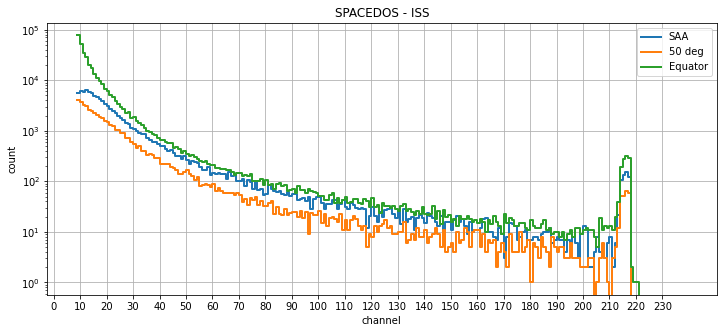

In [441]:
matplotlib.rcParams.update({'font.size': 10})

LOW_ENERGY = 9
HIGH_ENERGY = 240

#rca = rc.iloc[43200:800000].copy()
rca = rcc

LENGTH = 10000
rce = rca.loc[(rca['sum']>500) & (rca['sum']<10000)][:LENGTH]
print(len(rce))
#ener1 = rce.sum()[LOW_ENERGY:HIGH_ENERGY]
ener1 = rce.iloc[:,LOW_ENERGY:HIGH_ENERGY].sum()
rce = rca.loc[(rca['sum']>80) & (rca['sum']<500)][:LENGTH]
print(len(rce))
#ener2 = rce.sum()[LOW_ENERGY:HIGH_ENERGY]
ener2 = rce.iloc[:,LOW_ENERGY:HIGH_ENERGY].sum()
rce = rca.loc[(rca['sum']<80)][:LENGTH]
#rce = rc.loc[(rc['sum']>2.0) & (rc['sum']<13)][:LENGTH]
#rce = rc.loc[(rc['sum']>10) & (rc['sum']<80)][:LENGTH]
print(len(rce))
#ener3 = rce.sum()[LOW_ENERGY:HIGH_ENERGY]
ener3 = rce.iloc[:,LOW_ENERGY:HIGH_ENERGY].sum()


plt.figure(figsize=(12,5))
plt.yscale('log')
#plt.xscale('log')

plt.plot(ener1, label='SAA', lw=2, drawstyle='steps-post')
plt.plot(ener2, label='50 deg', lw=2, drawstyle='steps-post')
plt.plot(ener3, label='Equator', lw=2, drawstyle='steps-post')

#plt.ylim([0,12000])
#plt.xlim([0,40])
plt.legend()
plt.title('SPACEDOS - ISS')
plt.xlabel('channel')
plt.ylabel('count')
plt.xticks(range(0,240,10))
#plt.xticks(rotation=90)
plt.grid()

0.1 0.038


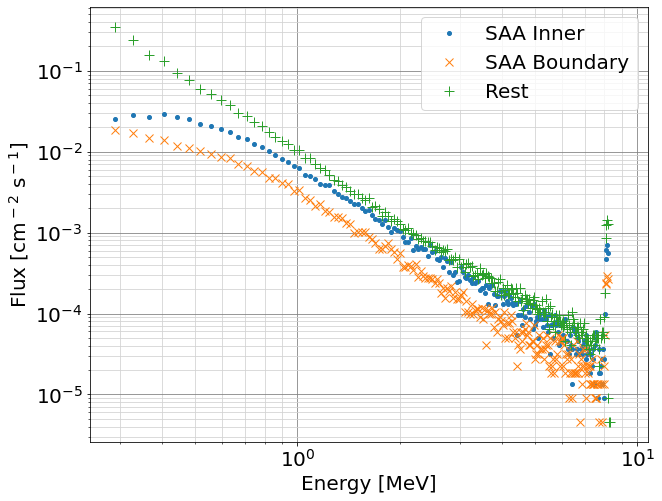

In [443]:
plt.figure(figsize=(10,8))
matplotlib.rcParams.update({'font.size': 20})

coef = np.array([0.,0.])
coef[1] = 0.038
coef[0] = 0.1

print (coef[0], coef[1])

e = pd.DataFrame()
e['1'] = ener1
e['2'] = ener2
e['3'] = ener3
e['i'] = ener1.index
e['x'] = (e['i'].astype(float)-4) * coef[1] + coef[0]

plt.yscale('log')
plt.xscale('log')

plt.plot(e['x'], e['1']/11/2/LENGTH , label='SAA Inner', ms=8, marker='.', drawstyle='steps-post', linestyle='')
plt.plot(e['x'], e['2']/11/2/LENGTH , label='SAA Boundary', ms=8, marker='x', drawstyle='steps-post', linestyle='')
plt.plot(e['x'], e['3']/11/2/LENGTH , label='Rest', ms=10, marker='+', drawstyle='steps-post', linestyle='')

#plt.plot(e['x'], e['1']/11/2/LENGTH , label='SAA Center', lw=2, drawstyle='steps-post', linestyle='-')
#plt.plot(e['x'], e['2']/11/2/LENGTH , label='SAA Edge', lw=2, drawstyle='steps-post', linestyle='-')
#plt.plot(e['x'], e['3']/11/2/LENGTH , label='Equator', lw=2, drawstyle='steps-post', linestyle='-')

#plt.ylim([0,12000])
#plt.xlim([0,40])
plt.legend()#loc=9)
#plt.title('SPACEDOS - ISS')
plt.xlabel('Energy [MeV]')
plt.ylabel(r'Flux [cm$^-$$^2$ s$^-$$^1$]')
#plt.ylabel(r'Counts [per 12 hours]')
#plt.xticks(rotation=90)
#plt.grid()
plt.grid(visible=True, which='major', color='gray', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgray', linestyle='-')


429039


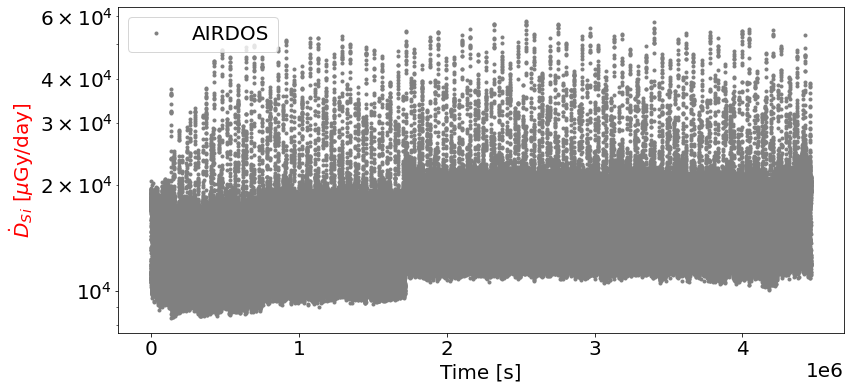

429039


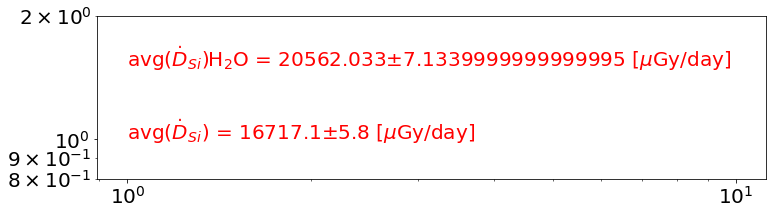

NameError: name 'e' is not defined

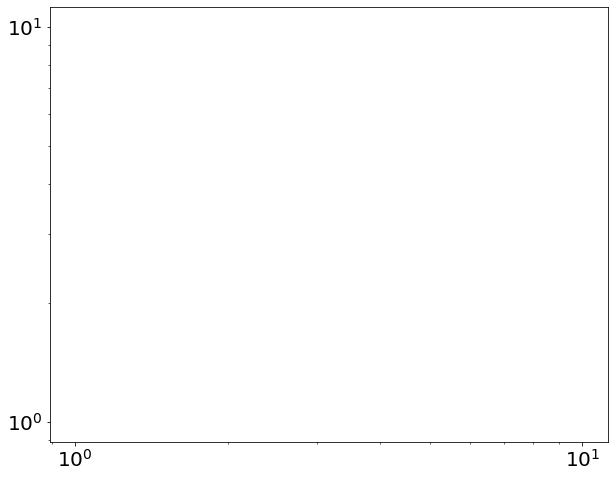

In [16]:
xx = df.copy()

#xx = xx.loc[(xx['sum']>100) & (xx['sum']<10000)]
#xx = xx.loc[(xx['sum']>500) & (xx['sum']<10000)]
#xx = xx.loc[(xx['sum']>100) & (xx['sum']<500)]
#xx = xx.loc[(xx['sum']>10) & (xx['sum']<13)]
print(len(xx))

CHANNELS = 245
NOISE_LEVEL = 7
FROM_ENERGY = 3

ee = pd.DataFrame()
ee['Ch']=range(0,256)
ee['ener'] = ee.index * 0.038 + 0.105 #- 0.038/2
#xx = pd.DataFrame(spectra)
#xx['ener'] = (np.asarray(xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+CHANNELS]) * np.asarray(e.loc[2:CHANNELS+1,'ener'])).sum(axis=1)
xx['ener'] = ((xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+CHANNELS]) * np.asarray(ee.loc[FROM_ENERGY:CHANNELS+(FROM_ENERGY-1),'ener'])).sum(axis=1)
#xx['date'] = c_all.index
xx['time'] = np.linspace(0, len(xx)*10.4, len(xx))

plt.figure(figsize=(13, 6))

xx['ddsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3)/10.4) * 3600 * 24 # in uGy/day
xx['dsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3))

plt.plot( xx.time, xx['ddsi'], c='gray', linestyle='', marker='.', label='AIRDOS')

#plt.ylim([0,4])
plt.yscale('log')

plt.xlabel('Time [s]')
plt.ylabel(r'$\.D$$_S$$_i$ [$\mu$Gy/day]', color='red')
plt.legend(loc=2)

DEATH_TIME = 1

dose = xx
avg_ddsi = round(xx['ddsi'].mean(), 1)
#avg_ddsi_err = round(xx['ddsi'].std(), 1)
avg_ddsi_err = round(xx['ddsi'].sem(), 1)
sum_dsi = round(xx['dsi'].sum()*DEATH_TIME/1e3,1)
sum_dh2o = round(sum_dsi * 1.23,1)
#plt.text(0, 1000, r'avg($\.D$$_S$$_i$) = '+ str(avg_ddsi) + '$\pm$' + str(avg_ddsi_err) + ' [$\mu$Gy/day]', fontsize=18, color='r', backgroundcolor='white')
#plt.text(0, 100, r'D$_S$$_i$ = ' + str(sum_dsi) + r' [mGy]', fontsize=18, color='red', backgroundcolor='white')
#plt.text(0, 10, r'D$_H$$_2$$_O$ = ' + str(sum_dh2o) + r' [mGy]', fontsize=18, color='red', backgroundcolor='white')

plt.legend(loc=2)
plt.show()

print(len(xx))

plt.figure(figsize=(12,3))
plt.text(1, 1, r'avg($\.D$$_S$$_i$) = '+ str(avg_ddsi) + '$\pm$' + str(avg_ddsi_err) + ' [$\mu$Gy/day]', fontsize=20, color='r', backgroundcolor='white')
plt.text(1, 1.5, r'avg($\.D$$_S$$_i$)H$_2$O = '+ str(avg_ddsi*1.23) + '$\pm$' + str(avg_ddsi_err*1.23) + ' [$\mu$Gy/day]', fontsize=20, color='r', backgroundcolor='white')
plt.yscale('log')
plt.xscale('log')
plt.ylim(0.8,2)
plt.show()

plt.figure(figsize=(10,8))
matplotlib.rcParams.update({'font.size': 20})

plt.tight_layout()
plt.yscale('log')
plt.xscale('log')

plt.plot(e['x'],e['1'], c='black', lw=3, drawstyle='steps-post', label='SPACEDOS')
#plt.legend()
plt.xlabel('Energy [MeV]')
plt.ylabel('Counts [-]')
#plt.grid()
plt.grid(visible=True, which='major', color='gray', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgray', linestyle='-')
#plt.text(4, 2e6, r'avg($\.D$$_S$$_i$) = '+ str(avg_ddsi) + '$\pm$' + str(avg_ddsi_err) + ' [$\mu$Gy/day]', fontsize=18, color='r', backgroundcolor='white')
#plt.text(4, 1e6, r'D$_S$$_i$ = ' + str(sum_dsi) + r' [mGy]', fontsize=18, color='red', backgroundcolor='white')
#plt.text(4, 5e5, r'D$_H$$_2$$_O$ = ' + str(sum_dh2o) + r' [mGy]', fontsize=18, color='red', backgroundcolor='white')

hist = xx.sum()[NOISE_LEVEL:NOISE_LEVEL+CHANNELS]
ener = ee.loc[FROM_ENERGY:CHANNELS+(FROM_ENERGY-1),'ener']
#plt.plot(ener,hist)
plt.show()

None

In [9]:
directory = '/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded'

numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

df=pd.DataFrame()

sn = '0'
files = sorted(glob.iglob(directory + '/*.TXT'), key=numericalSort)
for file in files:
    print(file)
    l=[]
    l.extend(range(0,254))
    f = pd.read_csv(file, sep=',', header=None, names=l, comment='*', low_memory=False)
    try:
        sn = f.loc[f[0]=='$DOS'].iloc[0,6]
        print("S.N.: ", sn)
    except:
        pass
    df = pd.concat([df,f], ignore_index=True)

#df = df.reset_index(drop=True)
print('All files was readed.')

/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/13.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/14.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/15.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/16.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/17.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/18.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/19.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/20.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/21.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/22.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/23.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/24.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/25.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/26.TXT
/stora

In [10]:
directory = '/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control'

numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

df2=pd.DataFrame()

sn = '0'
files = sorted(glob.iglob(directory + '/*.TXT'), key=numericalSort)
for file in files:
    print(file)
    l=[]
    l.extend(range(0,254))
    f = pd.read_csv(file, sep=',', header=None, names=l, comment='*', low_memory=False)
    try:
        sn = f.loc[f[0]=='$DOS'].iloc[0,6]
        print("S.N.: ", sn)
    except:
        pass
    df2 = pd.concat([df2,f], ignore_index=True)

#df = df.reset_index(drop=True)
print('All files was readed.')

/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/12.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/13.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/14.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/15.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/16.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/17.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/18.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/19.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/20.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/21.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/22.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/23.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/24.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/25.TXT
/storage/experiments

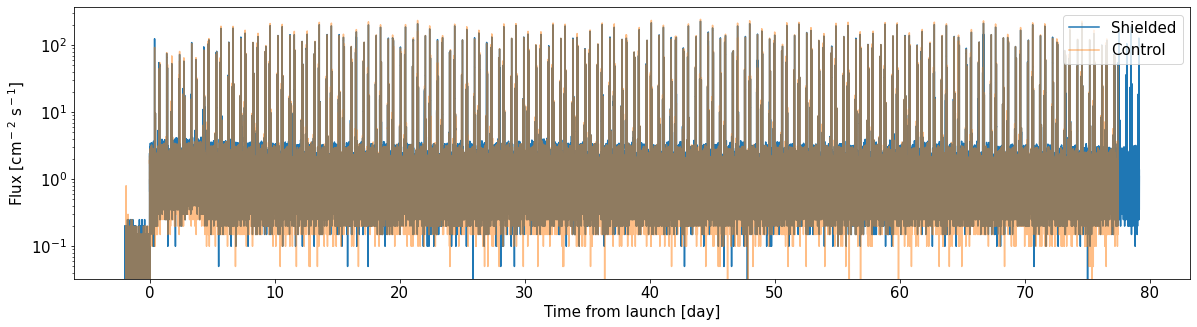

In [11]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

FIRST_CH = 9

df['flux'] = df.iloc[:,FIRST_CH:253].sum(axis=1)/2/10
df['time'] = df[2]-4275747888
df2['flux'] = df2.iloc[:,FIRST_CH:253].sum(axis=1)/2/10
df2['time'] = df2[2]-4275744660
df['day'] = df['time']/60/60/24
df2['day'] = df2['time']/60/60/24

#df['date'] = pd.to_datetime('21 May 2023, 21:37') + pd.to_timedelta(df['time'], unit='s')
#df = df.copy()
#df.set_index(df['date'])

#df2['date'] = pd.to_datetime('21 May 2023, 21:37') + pd.to_timedelta(df2['time'], unit='s')
#df2 = df2.copy()
#df2.set_index(df2['date'])

plt.plot(df['day'],df['flux'], drawstyle='steps-mid', label='Shielded')
plt.plot(df2['day'],df2['flux'], drawstyle='steps-mid', label='Control', alpha=0.5)
plt.yscale('log')

plt.ylabel(r'Flux [cm$^-$$^2$ s$^-$$^1$]')
plt.xlabel(r'Time from launch [day]')

plt.legend(loc=1)

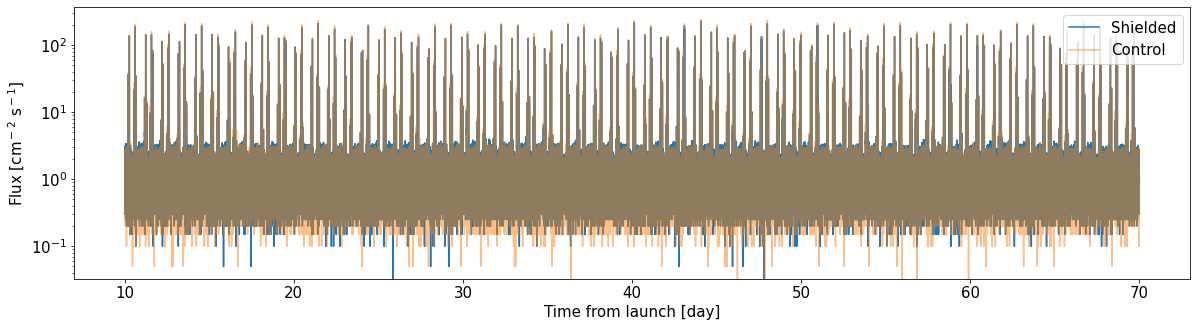

In [91]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

sl = df.loc[df['day']>10]
sl2 = df2.loc[df2['day']>10]

sl = sl.loc[sl['day']<70]
sl2 = sl2.loc[sl2['day']<70]

plt.plot(sl['day'],sl['flux'], drawstyle='steps-mid', label='Shielded')
plt.plot(sl2['day'],sl2['flux'], drawstyle='steps-mid', label='Control', alpha=0.5)
plt.yscale('log')

plt.ylabel(r'Flux [cm$^-$$^2$ s$^-$$^1$]')
plt.xlabel(r'Time from launch [day]')

plt.legend(loc=1)

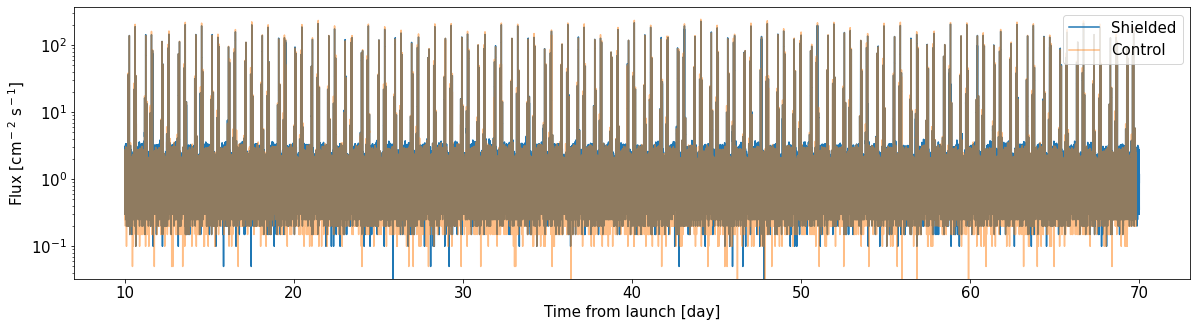

In [113]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

sl = df.loc[df['day']>10]
sl2 = df2.loc[df2['day']>10]

sl = sl.loc[sl['day']<70]
#sl2 = sl2.loc[sl2['day']<70]
sl2 = sl2.iloc[:len(sl),:]

plt.plot(sl['day'],sl['flux'], drawstyle='steps-mid', label='Shielded')
plt.plot(sl2['day'],sl2['flux'], drawstyle='steps-mid', label='Control', alpha=0.5)
plt.yscale('log')

plt.ylabel(r'Flux [cm$^-$$^2$ s$^-$$^1$]')
plt.xlabel(r'Time from launch [day]')

plt.legend(loc=1)

318151


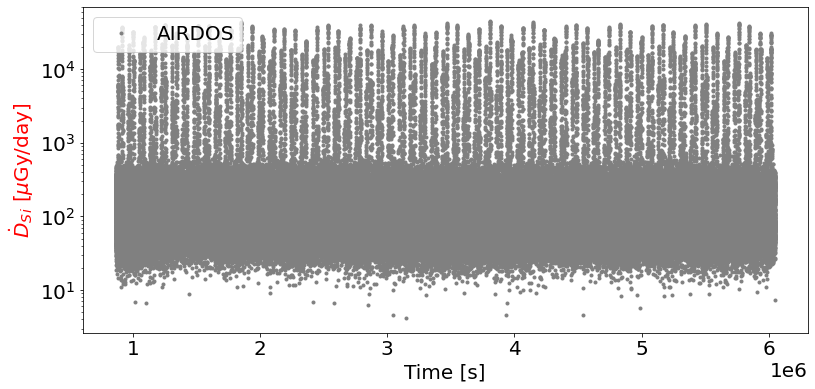

318151


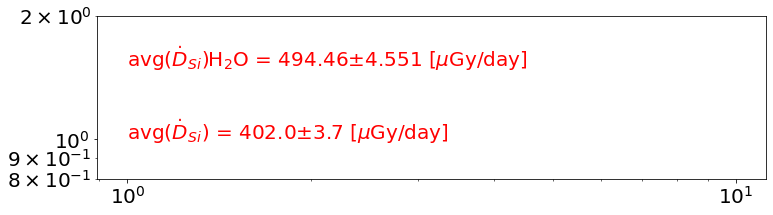

NameError: name 'e' is not defined

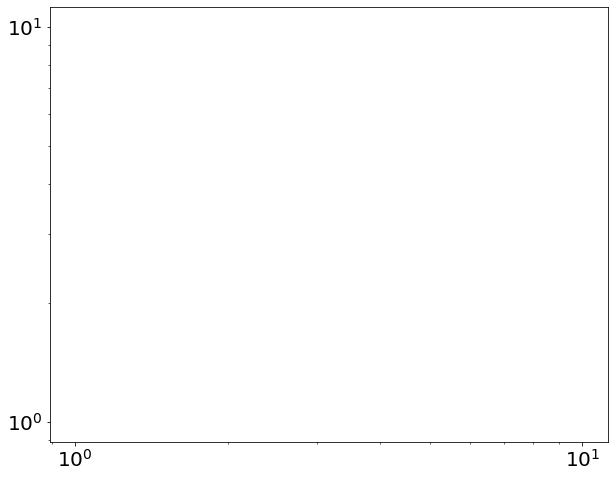

In [46]:
xx = sl2.copy()

#xx = xx.loc[(xx['sum']>100) & (xx['sum']<10000)]
#xx = xx.loc[(xx['sum']>500) & (xx['sum']<10000)]
#xx = xx.loc[(xx['sum']>100) & (xx['sum']<500)]
#xx = xx.loc[xx['flux']<2]
print(len(xx))

CHANNELS = 245
NOISE_LEVEL = 8
FROM_ENERGY = 3

ee = pd.DataFrame()
ee['Ch']=range(0,256)
ee['ener'] = ee.index * 0.038 + 0.105 #- 0.038/2
#xx = pd.DataFrame(spectra)
#xx['ener'] = (np.asarray(xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+CHANNELS]) * np.asarray(e.loc[2:CHANNELS+1,'ener'])).sum(axis=1)
xx['ener'] = ((xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+CHANNELS]) * np.asarray(ee.loc[FROM_ENERGY:CHANNELS+(FROM_ENERGY-1),'ener'])).sum(axis=1)
#xx['date'] = c_all.index
#xx['time'] = np.linspace(0, len(xx)*10.4, len(xx))

plt.figure(figsize=(13, 6))

xx['ddsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3)/10.4) * 3600 * 24 # in uGy/day
xx['dsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3))

plt.plot( xx.time, xx['ddsi'], c='gray', linestyle='', marker='.', label='AIRDOS')

#plt.ylim([0,4])
plt.yscale('log')

plt.xlabel('Time [s]')
plt.ylabel(r'$\.D$$_S$$_i$ [$\mu$Gy/day]', color='red')
plt.legend(loc=2)

DEATH_TIME = 1

dose = xx
avg_ddsi = round(xx['ddsi'].mean(), 1)
#avg_ddsi_err = round(xx['ddsi'].std(), 1)
avg_ddsi_err = round(xx['ddsi'].sem(), 1)
sum_dsi = round(xx['dsi'].sum()*DEATH_TIME/1e3,1)
sum_dh2o = round(sum_dsi * 1.23,1)
#plt.text(0, 1000, r'avg($\.D$$_S$$_i$) = '+ str(avg_ddsi) + '$\pm$' + str(avg_ddsi_err) + ' [$\mu$Gy/day]', fontsize=18, color='r', backgroundcolor='white')
#plt.text(0, 100, r'D$_S$$_i$ = ' + str(sum_dsi) + r' [mGy]', fontsize=18, color='red', backgroundcolor='white')
#plt.text(0, 10, r'D$_H$$_2$$_O$ = ' + str(sum_dh2o) + r' [mGy]', fontsize=18, color='red', backgroundcolor='white')

plt.legend(loc=2)
plt.show()

print(len(xx))

plt.figure(figsize=(12,3))
plt.text(1, 1, r'avg($\.D$$_S$$_i$) = '+ str(avg_ddsi) + '$\pm$' + str(avg_ddsi_err) + ' [$\mu$Gy/day]', fontsize=20, color='r', backgroundcolor='white')
plt.text(1, 1.5, r'avg($\.D$$_S$$_i$)H$_2$O = '+ str(round(avg_ddsi*1.23,2)) + '$\pm$' + str(avg_ddsi_err*1.23) + ' [$\mu$Gy/day]', fontsize=20, color='r', backgroundcolor='white')
plt.yscale('log')
plt.xscale('log')
plt.ylim(0.8,2)
plt.show()

plt.figure(figsize=(10,8))
matplotlib.rcParams.update({'font.size': 20})

plt.tight_layout()
plt.yscale('log')
plt.xscale('log')

plt.plot(e['x'],e['1'], c='black', lw=1, drawstyle='steps-post', label='SPACEDOS')
#plt.legend()
plt.xlabel('Energy [MeV]')
plt.ylabel('Counts [-]')
#plt.grid()
plt.grid(visible=True, which='major', color='gray', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgray', linestyle='-')
#plt.text(4, 2e6, r'avg($\.D$$_S$$_i$) = '+ str(avg_ddsi) + '$\pm$' + str(avg_ddsi_err) + ' [$\mu$Gy/day]', fontsize=18, color='r', backgroundcolor='white')
#plt.text(4, 1e6, r'D$_S$$_i$ = ' + str(sum_dsi) + r' [mGy]', fontsize=18, color='red', backgroundcolor='white')
#plt.text(4, 5e5, r'D$_H$$_2$$_O$ = ' + str(sum_dh2o) + r' [mGy]', fontsize=18, color='red', backgroundcolor='white')

hist = xx.sum()[NOISE_LEVEL:NOISE_LEVEL+CHANNELS]
ener = ee.loc[FROM_ENERGY:CHANNELS+(FROM_ENERGY-1),'ener']
plt.plot(ener,hist, drawstyle='steps-post')
plt.show()

None

In [86]:
df

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,flux,time,day
0,$HIST,0,4275576917,1651,0,1906,53884,8059,33,2,...,0,0,0,0,0,0,0,0.10,-170971,-1.978831
1,$HIST,1,4275576942,1693,1,1940,53689,8169,42,0,...,0,0,0,0,0,0,0,0.05,-170946,-1.978542
2,$HIST,2,4275576958,1601,2,1824,54054,8018,34,1,...,0,0,0,0,0,0,0,0.10,-170930,-1.978356
3,$HIST,3,4275576974,1681,1,1924,53912,7965,52,0,...,0,0,0,0,0,0,0,0.00,-170914,-1.978171
4,$HIST,4,4275576990,1592,0,1947,53573,8363,60,0,...,0,0,0,0,0,0,0,0.00,-170898,-1.977986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429034,$HIST,10996,4282587322,1778,0,1301,52818,9549,69,4,...,0,0,0,0,0,0,0,1.00,6839434,79.160116
429035,$HIST,10997,4282587339,1607,1,1318,52802,9717,62,4,...,0,0,0,0,0,0,0,1.40,6839451,79.160313
429036,$HIST,10998,4282587356,1778,0,1211,52725,9740,66,5,...,0,0,0,0,0,0,0,0.75,6839468,79.160509
429037,$HIST,10999,4282587372,1719,0,1283,52921,9549,45,1,...,0,0,0,0,0,0,0,0.90,6839484,79.160694


317200
318151


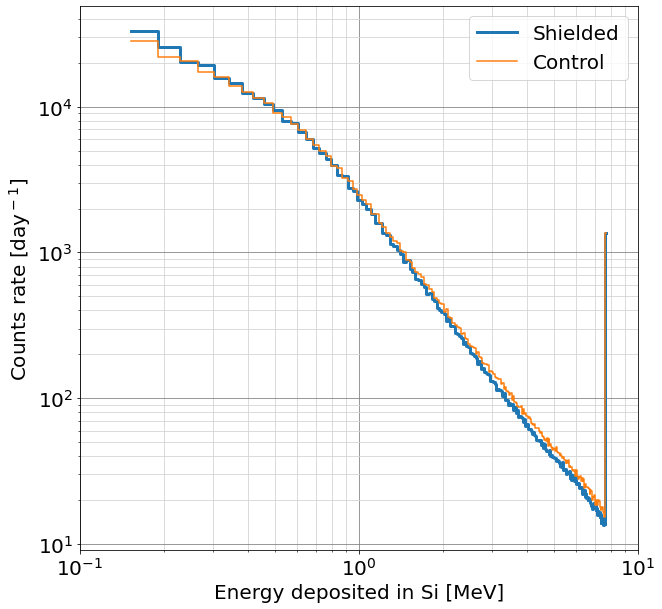

In [7]:
plt.figure(figsize=(10,10))
matplotlib.rcParams.update({'font.size': 20})

xx = sl.copy()
print(len(xx))

ee = pd.DataFrame()
ee['Ch']=range(0,256)
ee['ener'] = ee.index * 0.038 + 0.038

plt.tight_layout()
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.1,10)
plt.xlabel('Energy deposited in Si [MeV]')
plt.ylabel('Counts rate [day$^-$$^1$]')
plt.grid(visible=True, which='major', color='gray', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgray', linestyle='-')

hist = xx.sum()[6:250]
hist.iloc[200] = hist.iloc[200:244].sum()
hist.iloc[201:] = np.nan

ener = ee.loc[0:248,'ener']
plt.plot(ener.iloc[3:240],hist.iloc[3:240]/60, lw=3, drawstyle='steps-post', label='Shielded')

xx = sl2.copy()
print(len(xx))

hist = xx.sum()[6:250]
hist.iloc[200] = hist.iloc[220:244].sum()
hist.iloc[201:] = np.nan

plt.plot(ener.iloc[3:240],hist.iloc[3:240]/60, drawstyle='steps-post', label='Control')

plt.legend(loc=1)

None

In [12]:
xx.sum()[6:250]

6      10012827929
7        213743482
8          2503158
9          1699973
10         1304231
          ...     
245              0
246              1
247              0
248              0
249              0
Length: 244, dtype: object

317200
100738.0
318151
125676.0


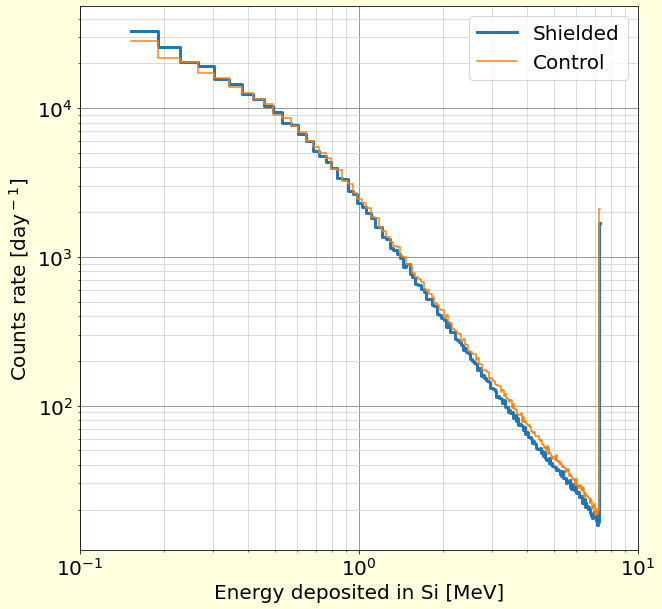

In [681]:
plt.figure(figsize=(10,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 20})

xx = sl.copy()
print(len(xx))

ee = pd.DataFrame()
ee['Ch']=range(0,256)
ee['ener'] = ee.index * 0.038 + 0.038

plt.tight_layout()
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.1,10)
plt.xlabel('Energy deposited in Si [MeV]')
plt.ylabel('Counts rate [day$^-$$^1$]')
plt.grid(visible=True, which='major', color='gray', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgray', linestyle='-')

hist = xx.iloc[:,6:254].sum()
hist.iloc[190] = hist.iloc[180:].sum()
hist.iloc[191:] = np.nan
print(hist.iloc[190])

ener = ee.loc[0:248,'ener']
plt.plot(ener.iloc[3:240],hist.iloc[3:240]/60, lw=3, drawstyle='steps-post', label='Shielded')

xx = sl2.copy()
print(len(xx))

hist = xx.iloc[:,6:254].sum()
hist.iloc[190] = hist.iloc[180:].sum()
hist.iloc[191:] = np.nan
print(hist.iloc[190])

plt.plot(ener.iloc[3:240],hist.iloc[3:240]/60, drawstyle='steps-post', label='Control')

plt.legend(loc=1)

None

Shielded ------------------
length = 317200
over = 1638
ddsi [uGy/day] = 233.9 from 0.12 [MeV] to 5.73 [MeV]
dsi [mGy] = 50.3
dH2O [mGy] = 41.9
Control ------------------
length = 317200
deathtime_diff = 1.0
over = 2084
ddsi [uGy/day] = 269.5 from 0.12 [MeV] to 5.73 [MeV]
dsi [mGy] = 57.9
dH2O [mGy] = 48.2
length corrected = 317200.0


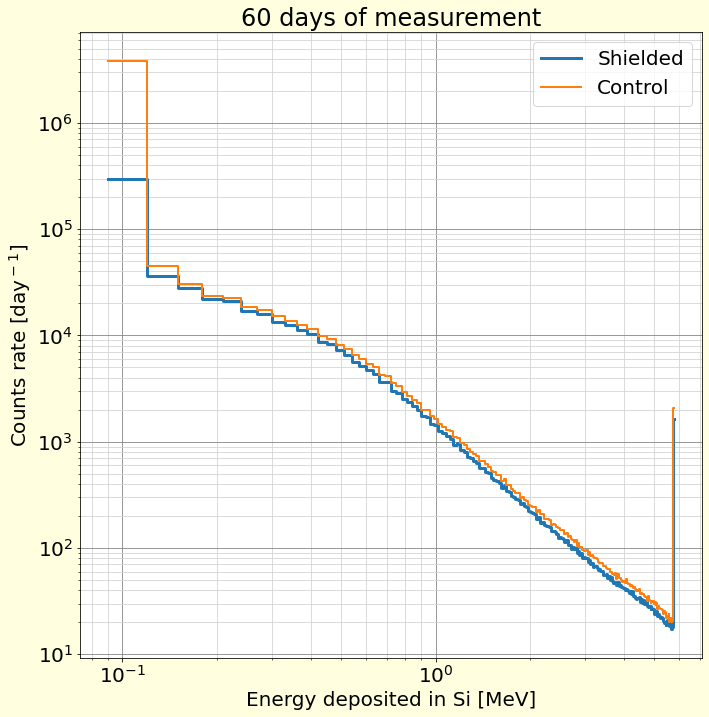

In [180]:
plt.figure(figsize=(10,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 20})
plt.title('60 days of measurement')

print('Shielded ------------------')
xx = sl.copy()
#xx = xx.loc[xx['flux']<2]
sllen = len(sl)
print('length =', sllen)

ee = pd.DataFrame()
ee['Ch']=range(0,256)
ee['ener'] = ee.index * 0.030 + 0.030
ee['cener'] = (xx.iloc[:,6:254].sum()/(len(xx)*15)*(60*60*24)).reset_index(drop=True) # counts per day
#ee.loc[190,'cener'] = ee.loc[190:,'cener'].sum()
#ee.loc[191:,'cener'] = np.nan
over =  ee.loc[190:,'cener'].sum()
ee.loc[190:,'cener'] = np.nan
ee.loc[190,'cener'] = over
print('over =', int(round(over,0)))
ee['dener'] = ee['ener'] * ee['cener']

# size of the chip (20 mm · 10 mm), 
# the thickness of the depletion layer (0.3 mm), 
# and the density of silicon (2.33 g cm^3)
# = 0.1398e-3 kg
# Meier DLR: 0.16597 g
# pro 230 um ~ 0.10252e-3 kg
#dose = ((1e6 * (1.602e-19 * depener * 1e6)/0.1398e-3)/integration_time) * 3600 # in uGy/h
ddsi = ((1e6 * (1.602e-19 * ee.loc[3:,'dener'].sum() * 1e6)/1.0252e-4)/1) # in uGy/day
print('ddsi [uGy/day] =', round(ddsi,1), 'from', ee.loc[3,'ener'], '[MeV] to', ee.loc[190,'ener'], '[MeV]')
print('dsi [mGy] =', round(ddsi*214.8/1000,1))
print('dH2O [mGy] =', round(ddsi*214.8/1000/1.2,1))

'''
xx['ener'] = ((xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+CHANNELS]) * np.asarray(ee.loc[FROM_ENERGY:CHANNELS+(FROM_ENERGY-1),'ener'])).sum(axis=1)
xx['ddsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3)/10.4) * 3600 # in uGy/h
xx['dsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3))
avg_ddsi_err = round(xx['ddsi'].sem(), 1)
print('err [uGy/h] =', round(avg_ddsi_err,1))
'''

plt.tight_layout()
plt.yscale('log')
plt.xscale('log')
#plt.xlim(0.1,10)
plt.xlabel('Energy deposited in Si [MeV]')
plt.ylabel('Counts rate [day$^-$$^1$]')
plt.grid(visible=True, which='major', color='gray', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgray', linestyle='-')

plt.plot(ee.loc[2:,'ener'],ee.loc[2:,'cener'], lw=3, drawstyle='steps-post', label='Shielded')

print('Control ------------------')
xx = sl2.copy()
#xx = xx.loc[xx['flux']<2]
sl2len = len(sl2)
print('length =', sl2len)
deathtime_diff = sllen/sl2len
print('deathtime_diff =', deathtime_diff)

ee['cener'] = (xx.iloc[:,5:254].sum()/(len(xx)*15)*(60*60*24)).reset_index(drop=True) # counts per day
over =  ee.loc[190:,'cener'].sum()
ee.loc[190:,'cener'] = np.nan
ee.loc[190,'cener'] = over
print('over =', int(round(over,0)))
ee['dener'] = ee['ener'] * ee['cener']
ddsi = ((1e6 * (1.602e-19 * ee.loc[3:,'dener'].sum() * 1e6)/1.0252e-4)/1) # in uGy/day
print('ddsi [uGy/day] =', round(ddsi,1), 'from', ee.loc[3,'ener'], '[MeV] to', ee.loc[190,'ener'], '[MeV]')
print('dsi [mGy] =', round(ddsi*214.8/1000,1))
print('dH2O [mGy] =', round(ddsi*214.8/1000/1.2,1))
print('length corrected =', sl2len * deathtime_diff)

plt.plot(ee.loc[2:,'ener'],ee.loc[2:,'cener'], lw=2, drawstyle='steps-post', label='Control')

plt.legend(loc=1)

None

Shielded ------------------
length = 317200
over = 1638
ddsi [uGy/day] = 249.5 from 0.128 [MeV] to 6.112 [MeV]
dsi [mGy] = 53.6
dH2O [mGy] = 44.7
Control ------------------
length = 317200
deathtime_diff = 1.0
over = 2084
ddsi [uGy/day] = 287.4 from 0.128 [MeV] to 6.112 [MeV]
dsi [mGy] = 61.7
dH2O [mGy] = 51.5
length corrected = 317200.0


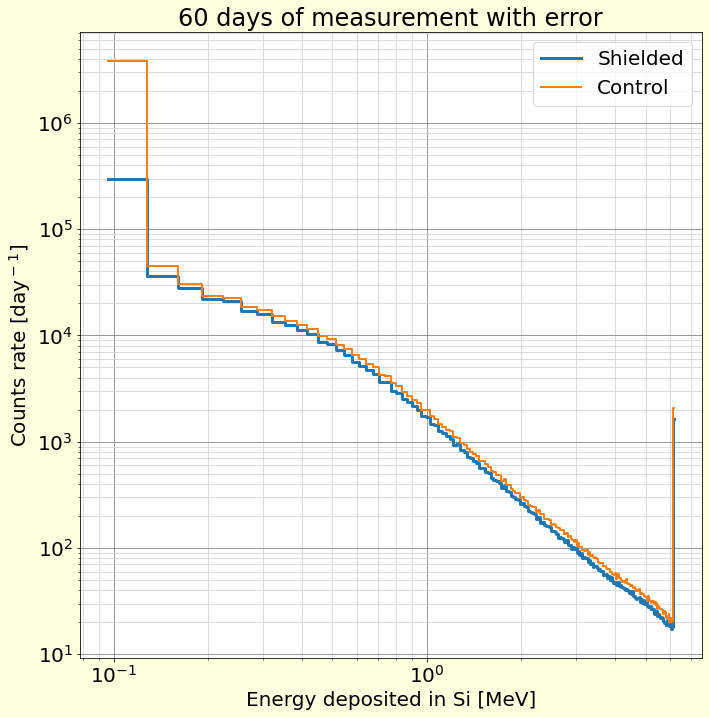

In [185]:
plt.figure(figsize=(10,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 20})
plt.title('60 days of measurement with error')

print('Shielded ------------------')
xx = sl.copy()
#xx = xx.loc[xx['flux']<2]
sllen = len(sl)
print('length =', sllen)

ee = pd.DataFrame()
ee['Ch']=range(0,256)
ee['ener'] = ee.index * 0.032 + 0.032
ee['cener'] = (xx.iloc[:,6:254].sum()/(len(xx)*15)*(60*60*24)).reset_index(drop=True) # counts per day
#ee.loc[190,'cener'] = ee.loc[190:,'cener'].sum()
#ee.loc[191:,'cener'] = np.nan
over =  ee.loc[190:,'cener'].sum()
ee.loc[190:,'cener'] = np.nan
ee.loc[190,'cener'] = over
print('over =', int(round(over,0)))
ee['dener'] = ee['ener'] * ee['cener']

# size of the chip (20 mm · 10 mm), 
# the thickness of the depletion layer (0.3 mm), 
# and the density of silicon (2.33 g cm^3)
# = 0.1398e-3 kg
# Meier DLR: 0.16597 g
# pro 230 um ~ 0.10252e-3 kg
#dose = ((1e6 * (1.602e-19 * depener * 1e6)/0.1398e-3)/integration_time) * 3600 # in uGy/h
ddsi = ((1e6 * (1.602e-19 * ee.loc[3:,'dener'].sum() * 1e6)/1.0252e-4)/1) # in uGy/day
print('ddsi [uGy/day] =', round(ddsi,1), 'from', ee.loc[3,'ener'], '[MeV] to', ee.loc[190,'ener'], '[MeV]')
print('dsi [mGy] =', round(ddsi*214.8/1000,1))
print('dH2O [mGy] =', round(ddsi*214.8/1000/1.2,1))

'''
xx['ener'] = ((xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+CHANNELS]) * np.asarray(ee.loc[FROM_ENERGY:CHANNELS+(FROM_ENERGY-1),'ener'])).sum(axis=1)
xx['ddsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3)/10.4) * 3600 # in uGy/h
xx['dsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3))
avg_ddsi_err = round(xx['ddsi'].sem(), 1)
print('err [uGy/h] =', round(avg_ddsi_err,1))
'''

plt.tight_layout()
plt.yscale('log')
plt.xscale('log')
#plt.xlim(0.1,10)
plt.xlabel('Energy deposited in Si [MeV]')
plt.ylabel('Counts rate [day$^-$$^1$]')
plt.grid(visible=True, which='major', color='gray', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgray', linestyle='-')

plt.plot(ee.loc[2:,'ener'],ee.loc[2:,'cener'], lw=3, drawstyle='steps-post', label='Shielded')

print('Control ------------------')
xx = sl2.copy()
#xx = xx.loc[xx['flux']<2]
sl2len = len(sl2)
print('length =', sl2len)
deathtime_diff = sllen/sl2len
print('deathtime_diff =', deathtime_diff)

ee['cener'] = (xx.iloc[:,5:254].sum()/(len(xx)*15)*(60*60*24)).reset_index(drop=True) # counts per day
over =  ee.loc[190:,'cener'].sum()
ee.loc[190:,'cener'] = np.nan
ee.loc[190,'cener'] = over
print('over =', int(round(over,0)))
ee['dener'] = ee['ener'] * ee['cener']
ddsi = ((1e6 * (1.602e-19 * ee.loc[3:,'dener'].sum() * 1e6)/1.0252e-4)/1) # in uGy/day
print('ddsi [uGy/day] =', round(ddsi,1), 'from', ee.loc[3,'ener'], '[MeV] to', ee.loc[190,'ener'], '[MeV]')
print('dsi [mGy] =', round(ddsi*214.8/1000,1))
print('dH2O [mGy] =', round(ddsi*214.8/1000/1.2,1))
print('length corrected =', sl2len * deathtime_diff)

plt.plot(ee.loc[2:,'ener'],ee.loc[2:,'cener'], lw=2, drawstyle='steps-post', label='Control')

plt.legend(loc=1)

None

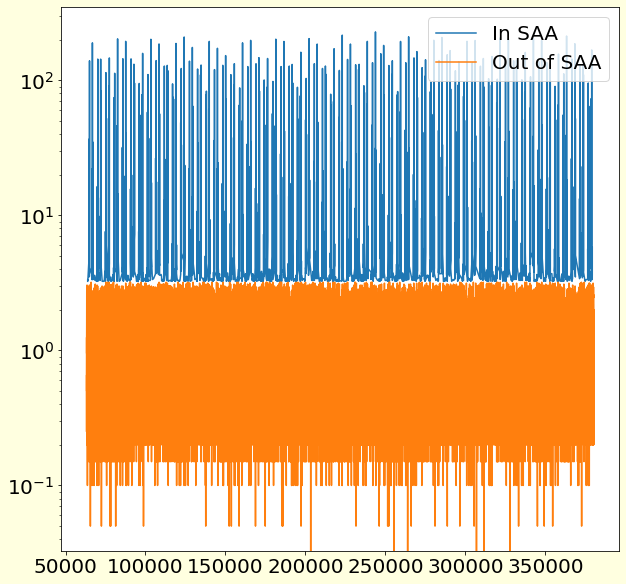

Shielded ------------------
11488
over = 27303
ddsi [uGy/day] = 4141.6 from 0.15 [MeV] to 5.73 [MeV]
Control ------------------
11156
over = 43674
ddsi [uGy/day] = 5093.5 from 0.15 [MeV] to 5.73 [MeV]


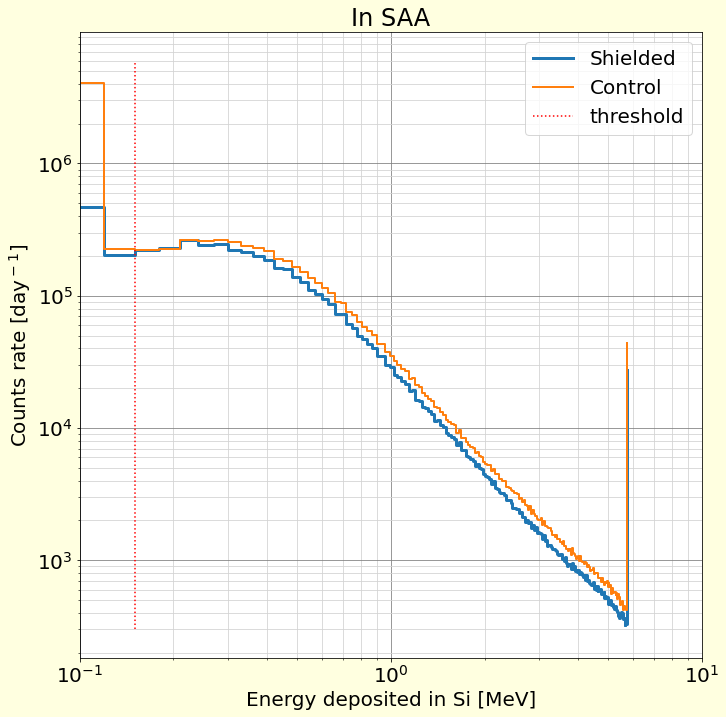

Shielded ------------------
305712
over = 674
ddsi [uGy/day] = 80.1 from 0.15 [MeV] to 5.73 [MeV]
Control ------------------
306044
over = 737
ddsi [uGy/day] = 86.3 from 0.15 [MeV] to 5.73 [MeV]


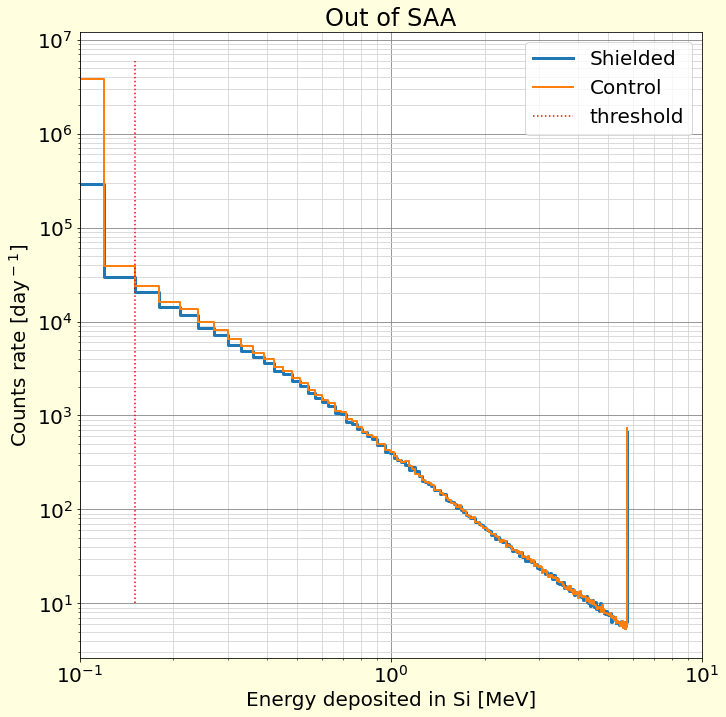

In [198]:
THRESHOLD = 3.2

plt.figure(figsize=(10,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 20})

plt.plot(sl['flux'].loc[sl['flux']>THRESHOLD], label='In SAA')
plt.plot(sl2['flux'].loc[sl2['flux']<=THRESHOLD], label='Out of SAA')
plt.legend(loc=1)
plt.yscale('log')
plt.show()
         
plt.figure(figsize=(10,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 20})
plt.title('In SAA')
plt.tight_layout()
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.1,10)
#plt.ylim(0,2500)
plt.xlabel('Energy deposited in Si [MeV]')
plt.ylabel('Counts rate [day$^-$$^1$]')
plt.grid(visible=True, which='major', color='gray', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgray', linestyle='-')

xx = sl.copy()
xx = xx.loc[xx['flux']>THRESHOLD]
print('Shielded ------------------')

print(len(xx))

ee = pd.DataFrame()
ee['Ch']=range(0,256)
ee['ener'] = ee.index * 0.030 + 0.030
ee['cener'] = (xx.iloc[:,6:254].sum()/(len(xx)*15)*(60*60*24)).reset_index(drop=True) # counts per day
#ee['cener'] = (xx.iloc[:,6:254].sum()/60).reset_index(drop=True) # counts per day
ee.loc[190,'cener'] = ee.loc[190:,'cener'].sum()
ee.loc[191:,'cener'] = np.nan
print('over =', int(round(ee.loc[190,'cener'],0)))
ee['dener'] = ee['ener'] * ee['cener']
ddsi = ((1e6 * (1.602e-19 * ee.loc[4:,'dener'].sum() * 1e6)/1.0252e-4)/1) # in uGy/day
print('ddsi [uGy/day] =', round(ddsi,1), 'from', ee.loc[4,'ener'], '[MeV] to', ee.loc[190,'ener'], '[MeV]')

plt.plot(ee.loc[2:,'ener'],ee.loc[2:,'cener'], lw=3, drawstyle='steps-post', label='Shielded')

xx = sl2.copy()
xx = xx.loc[xx['flux']>THRESHOLD]
print('Control ------------------')
print(len(xx))

ee['cener'] = (xx.iloc[:,5:254].sum()/(len(xx)*15)*(60*60*24)).reset_index(drop=True) # counts per day
#ee['cener'] = (xx.iloc[:,6:254].sum()/60).reset_index(drop=True) # counts per day
ee.loc[190,'cener'] = ee.loc[180:,'cener'].sum()
ee.loc[191:,'cener'] = np.nan
print('over =', int(round(ee.loc[190,'cener'],0)))
ee['dener'] = ee['ener'] * ee['cener']
ddsi = ((1e6 * (1.602e-19 * ee.loc[4:,'dener'].sum() * 1e6)/1.0252e-4)/1) # in uGy/day
print('ddsi [uGy/day] =', round(ddsi,1), 'from', ee.loc[4,'ener'], '[MeV] to', ee.loc[190,'ener'], '[MeV]')

plt.plot(ee.loc[2:,'ener'],ee.loc[2:,'cener'], lw=2, drawstyle='steps-post', label='Control')

plt.vlines(ee.loc[4,'ener'],300, 6e6, color='red', linestyle=':', label='threshold')
plt.legend(loc=1)
plt.show()

plt.figure(figsize=(10,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 20})
plt.title('Out of SAA')
plt.tight_layout()
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.1,10)
#plt.ylim(0,2500)
plt.xlabel('Energy deposited in Si [MeV]')
plt.ylabel('Counts rate [day$^-$$^1$]')
plt.grid(visible=True, which='major', color='gray', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgray', linestyle='-')

xx = sl.copy()
xx = xx.loc[xx['flux']<=THRESHOLD]
print('Shielded ------------------')
print(len(xx))

ee['cener'] = (xx.iloc[:,6:254].sum()/(len(xx)*15)*(60*60*24)).reset_index(drop=True) # counts per day
#ee['cener'] = (xx.iloc[:,6:254].sum()/60).reset_index(drop=True) # counts per day
ee.loc[190,'cener'] = ee.loc[190:,'cener'].sum()
ee.loc[191:,'cener'] = np.nan
print('over =', int(round(ee.loc[190,'cener'],0)))
ee['dener'] = ee['ener'] * ee['cener']
ddsi = ((1e6 * (1.602e-19 * ee.loc[4:,'dener'].sum() * 1e6)/1.0252e-4)/1) # in uGy/day
print('ddsi [uGy/day] =', round(ddsi,1), 'from', ee.loc[4,'ener'], '[MeV] to', ee.loc[190,'ener'], '[MeV]')

plt.plot(ee.loc[2:,'ener'],ee.loc[2:,'cener'], lw=3, drawstyle='steps-post', label='Shielded')

xx = sl2.copy()
xx = xx.loc[xx['flux']<=THRESHOLD]
print('Control ------------------')
print(len(xx))

ee['cener'] = (xx.iloc[:,5:254].sum()/(len(xx)*15)*(60*60*24)).reset_index(drop=True) # counts per day
#ee['cener'] = (xx.iloc[:,6:254].sum()/60).reset_index(drop=True) # counts per day
ee.loc[190,'cener'] = ee.loc[190:,'cener'].sum()
ee.loc[191:,'cener'] = np.nan
print('over =', int(round(ee.loc[190,'cener'],0)))
ee['dener'] = ee['ener'] * ee['cener']
ddsi = ((1e6 * (1.602e-19 * ee.loc[4:,'dener'].sum() * 1e6)/1.0252e-4)/1) # in uGy/day
print('ddsi [uGy/day] =', round(ddsi,1), 'from', ee.loc[4,'ener'], '[MeV] to', ee.loc[190,'ener'], '[MeV]')

plt.plot(ee.loc[2:,'ener'],ee.loc[2:,'cener'], lw=2, drawstyle='steps-post', label='Control')

plt.vlines(ee.loc[4,'ener'],10, 6e6, color='red', linestyle=':', label='threshold')
plt.legend(loc=1)
plt.show()

None

In [2]:
directory = '/storage/experiments/2024/03_ISS_SPACEDOS03/AX2-MSPD-001_Shielded_0x42'

numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

df3=pd.DataFrame()

sn = '0'
files = sorted(glob.iglob(directory + '/*.TXT'), key=numericalSort)
for file in files:
    print(file)
    l=[]
    l.extend(range(0,254))
    f = pd.read_csv(file, sep=',', header=None, names=l, comment='*', low_memory=False)
    try:
        sn = f.loc[f[0]=='$DOS'].iloc[0,6]
        print("S.N.: ", sn)
    except:
        pass
    df3 = pd.concat([df3,f], ignore_index=True)

#df = df.reset_index(drop=True)
print('All files was readed.')

/storage/experiments/2024/03_ISS_SPACEDOS03/AX2-MSPD-001_Shielded_0x42/0.TXT
S.N.:  nan
/storage/experiments/2024/03_ISS_SPACEDOS03/AX2-MSPD-001_Shielded_0x42/1.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/AX2-MSPD-001_Shielded_0x42/2.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/AX2-MSPD-001_Shielded_0x42/3.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/AX2-MSPD-001_Shielded_0x42/4.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/AX2-MSPD-001_Shielded_0x42/5.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/AX2-MSPD-001_Shielded_0x42/6.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/AX2-MSPD-001_Shielded_0x42/7.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/AX2-MSPD-001_Shielded_0x42/8.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/AX2-MSPD-001_Shielded_0x42/9.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/AX2-MSPD-001_Shielded_0x42/10.TXT
S.N.:  nan
/storage/experiments/2024/03_ISS_SPACEDOS03/AX2-MSPD-001_Shielded_0x42/11.TXT
S.N.:  nan
/storage/experiments/2024/03_ISS_SPACEDOS

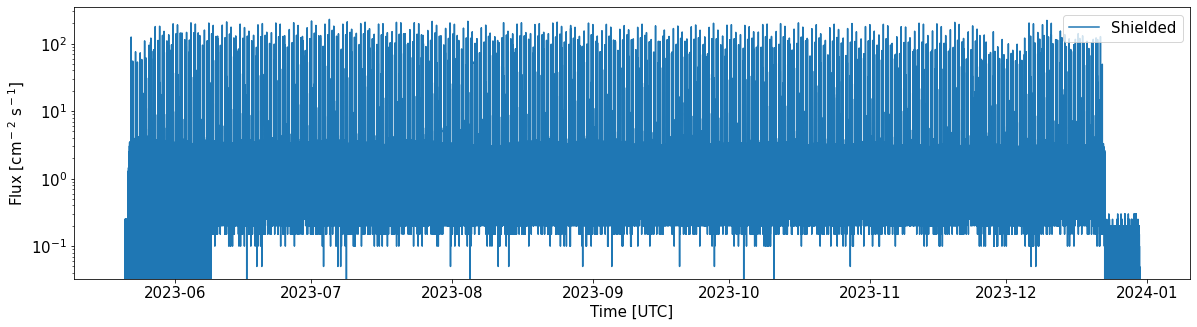

In [814]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

FIRST_CH = 9

df3['flux'] = df3.iloc[:,FIRST_CH:253].sum(axis=1)/2/10
df3[2] = pd.to_numeric(df3[2], errors='coerce')
df3['time'] = df3[2]-4275747888
df3['day'] = df3['time']/60/60/24

df3['date'] = pd.to_datetime('21 May 2023, 21:37') + pd.to_timedelta(df3['time'], unit='s')
df3 = df3.copy()
df3.set_index(df3['date'])

df3 = df3.loc[df3['day']>-2]

plt.plot(df3['date'],df3['flux'], label='Shielded')
plt.yscale('log')

plt.ylabel(r'Flux [cm$^-$$^2$ s$^-$$^1$]')
plt.xlabel(r'Time [UTC]')

plt.legend(loc=1)

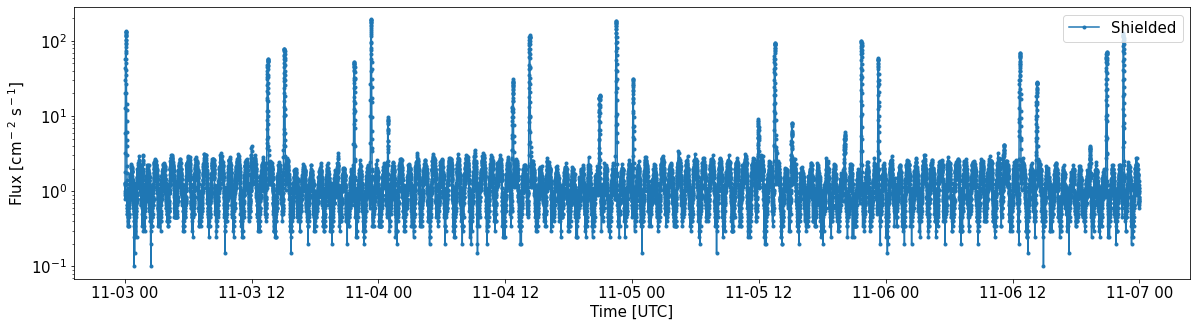

In [31]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

FIRST_CH = 9

df3['flux'] = df3.iloc[:,FIRST_CH:253].sum(axis=1)/2/10
df3[2] = pd.to_numeric(df3[2], errors='coerce')
df3['time'] = df3[2]-4275747888
df3['day'] = df3['time']/60/60/24

df3['date'] = pd.to_datetime('21 May 2023, 21:37') + pd.to_timedelta(df3['time'], unit='s')
df3 = df3.copy()
df3.set_index(df3['date'])

#df4 = df3.loc[df3['date']>'24 Nov 2023 00:00'].loc[df3['date']<'24 Nov 2023 23:00']
df4 = df3.loc[df3['date']>'3 Nov 2023 00:00'].loc[df3['date']<'7 Nov 2023 0:00']

plt.plot(df4['date'],df4['flux'], marker='.', label='Shielded')
plt.yscale('log')

plt.ylabel(r'Flux [cm$^-$$^2$ s$^-$$^1$]')
plt.xlabel(r'Time [UTC]')

plt.legend(loc=1)

437
61.0


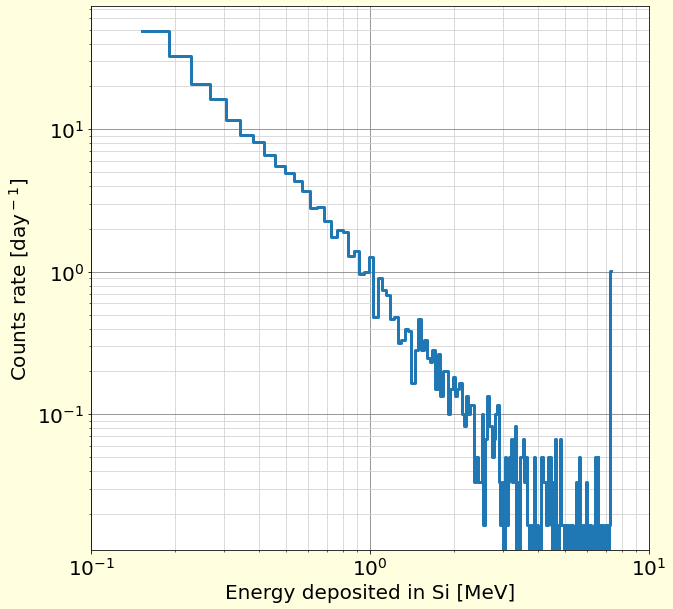

In [10]:
plt.figure(figsize=(10,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 20})

xx = df4.copy()
print(len(xx))

ee = pd.DataFrame()
ee['Ch']=range(0,256)
ee['ener'] = ee.index * 0.038 + 0.038

plt.tight_layout()
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.1,10)
plt.xlabel('Energy deposited in Si [MeV]')
plt.ylabel('Counts rate [day$^-$$^1$]')
plt.grid(visible=True, which='major', color='gray', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgray', linestyle='-')

hist = xx.iloc[:,6:254].sum()
hist.iloc[190] = hist.iloc[180:].sum()
hist.iloc[191:] = np.nan
print(hist.iloc[190])

ener = ee.loc[0:248,'ener']
plt.plot(ener.iloc[3:240],hist.iloc[3:240]/60, lw=3, drawstyle='steps-post', label='Shielded')

None

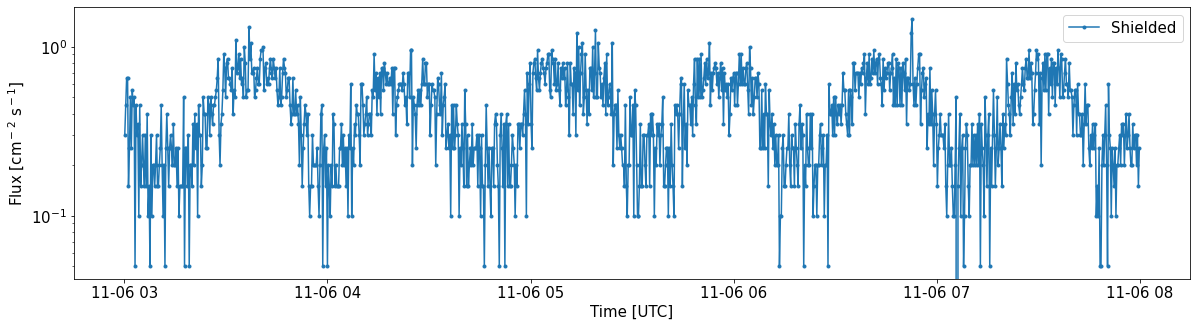

In [56]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

FIRST_CH = 9
LAST_CH = 11

df3['flux'] = df3.iloc[:,FIRST_CH:LAST_CH].sum(axis=1)/2/10
df3[2] = pd.to_numeric(df3[2], errors='coerce')
df3['time'] = df3[2]-4275747888
df3['day'] = df3['time']/60/60/24

df3['date'] = pd.to_datetime('21 May 2023, 21:37') + pd.to_timedelta(df3['time'], unit='s')
df3 = df3.copy()
df3.set_index(df3['date'])

#df4 = df3.loc[dfate']>'24 Nov 2023 00:00'].loc[df3['date']<'24 Nov 2023 23:00']
#df4 = df3.loc[df3['date']>'20 Nov 2023 00:00'].loc[df3['date']<'31 Dec 2023 0:00']
df4 = df3.loc[df3['date']>pd.to_datetime('2023-11-6 03:00')].loc[df3['date']<pd.to_datetime('2023-11-6 8:00')]
#df4 = df4.loc[df4['flux']>9]
#df4 = df3.loc[df3['date']>'5 Nov 2023 00:00'].loc[df3['date']<'6 Nov 2023 0:00']

plt.plot(df4['date'],df4['flux'], marker='.', label='Shielded')
plt.yscale('log')

plt.ylabel(r'Flux [cm$^-$$^2$ s$^-$$^1$]')
plt.xlabel(r'Time [UTC]')

plt.legend(loc=1)

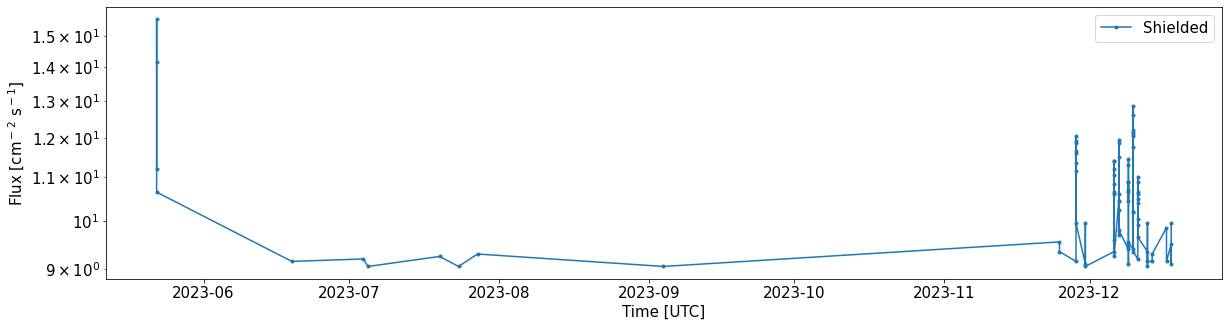

In [48]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

FIRST_CH = 9
LAST_CH = 10

df3['flux'] = df3.iloc[:,FIRST_CH:LAST_CH].sum(axis=1)/2/10
df3[2] = pd.to_numeric(df3[2], errors='coerce')
df3['time'] = df3[2]-4275747888
df3['day'] = df3['time']/60/60/24

df3['date'] = pd.to_datetime('21 May 2023, 21:37') + pd.to_timedelta(df3['time'], unit='s')
df3 = df3.copy()
df3.set_index(df3['date'])

#df4 = df3.loc[dfate']>'24 Nov 2023 00:00'].loc[df3['date']<'24 Nov 2023 23:00']
df4 = df3.loc[df3['date']>'20 May 2023 00:00'].loc[df3['date']<'31 Dec 2023 0:00']
df4 = df4.loc[df4['flux']>9]
#df4 = df3.loc[df3['date']>'5 Nov 2023 00:00'].loc[df3['date']<'6 Nov 2023 0:00']

plt.plot(df4['date'],df4['flux'], marker='.', label='Shielded')
plt.yscale('log')

plt.ylabel(r'Flux [cm$^-$$^2$ s$^-$$^1$]')
plt.xlabel(r'Time [UTC]')

plt.legend(loc=1)

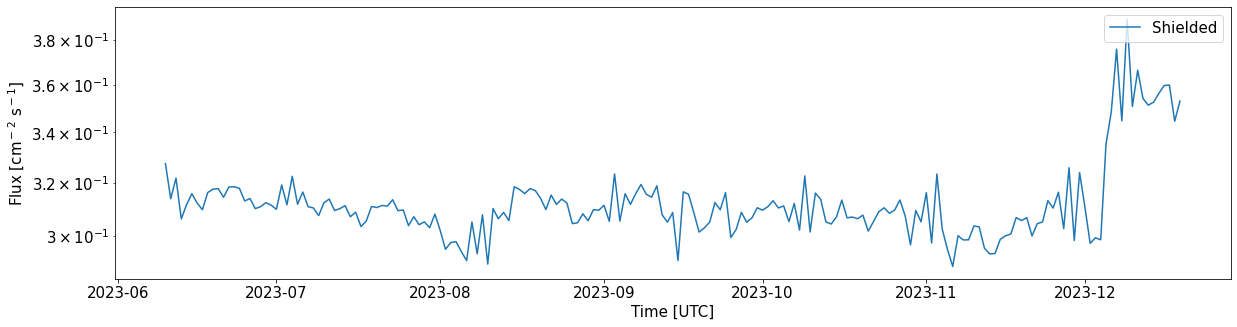

In [87]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

FIRST_CH = 9
LAST_CH = 10

df3['flux'] = df3.iloc[:,FIRST_CH:LAST_CH].sum(axis=1)/2/10
df3[2] = pd.to_numeric(df3[2], errors='coerce')
df3['time'] = df3[2]-4275747888
df3['day'] = df3['time']/60/60/24

df3['date'] = pd.to_datetime('21 May 2023, 21:37') + pd.to_timedelta(df3['time'], unit='s')
df4 = df3.copy()
df4.set_index('date', inplace=True)

#df4 = df4['flux'].loc[df4['date']>pd.to_datetime('2023-06-01')].loc[df4['date']<pd.to_datetime('2023-12-20')].copy()
#df4 = df4['flux'].loc[df4.index>pd.to_datetime('2023-06-01')].loc[df4.index<pd.to_datetime('2023-12-20')].copy()
df4 = df4.loc[df4.index>pd.to_datetime('2023-6-10')]
df4 = df4.loc[df4.index<pd.to_datetime('2023-12-20')]
df4 = df4.resample('1D').mean()

plt.plot(df4['flux'], label='Shielded')
plt.yscale('log')

plt.ylabel(r'Flux [cm$^-$$^2$ s$^-$$^1$]')
plt.xlabel(r'Time [UTC]')

plt.legend(loc=1)

In [3]:
df3

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
0,$DOS,SPACEDOS03,S04,4275397696,256,1290c00806a20090644aa000a0000042,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$HIST,0,4275397711,1623,3,4110,55047.0,4733.0,19.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,$HIST,1,4275397727,1581,3,4112,55211.0,4603.0,22.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,$HIST,2,4275397743,1560,4,3889,55061.0,4970.0,40.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,$HIST,3,4275397759,1853,5,3987,52078.0,6828.0,296.0,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494010,$HIST,990,2695933,1735,0,1178,54041.0,8549.0,32.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1494011,$HIST,991,2695949,1735,0,1233,54095.0,8437.0,34.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1494012,$HIST,992,2695965,1722,0,1287,54387.0,8110.0,28.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1494013,$HIST,993,2695981,1708,0,1257,54206.0,8335.0,27.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 0, 'Measurement No. [-]')

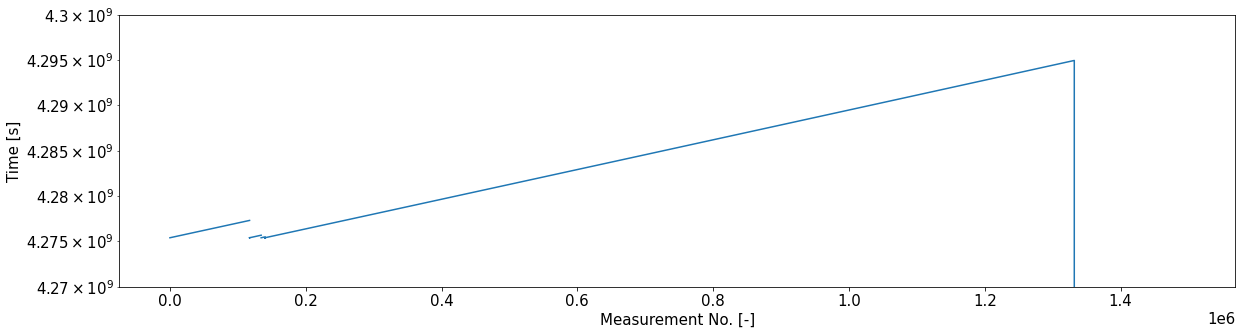

In [31]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})


plt.plot(pd.to_numeric(df3.iloc[1:,2], errors='coerce'))
plt.yscale('log')
plt.ylim(4.27e9, 4.3e9)

plt.ylabel(r'Time [s]')
plt.xlabel(r'Measurement No. [-]')


In [33]:
pd.to_numeric(df3.loc[df3[2]==0], errors='coerce')

TypeError: arg must be a list, tuple, 1-d array, or Series

In [34]:
df3.loc[df3[2]==0]


,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
1331756,$HIST,3751,0,1670,1,1286,53069.0,9463.0,46.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df3.iloc[1331754:]

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
1331754,$HIST,3749,4294967264,1718,0,1189,52969.0,9611.0,47.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1331755,$HIST,3750,4294967280,1763,0,1240,53165.0,9324.0,43.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1331756,$HIST,3751,0,1670,1,1286,53069.0,9463.0,46.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1331757,$HIST,3752,17,1775,0,1192,52763.0,9757.0,48.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1331758,$HIST,3753,33,1772,1,2428,54209.0,7089.0,34.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494010,$HIST,990,2695933,1735,0,1178,54041.0,8549.0,32.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1494011,$HIST,991,2695949,1735,0,1233,54095.0,8437.0,34.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1494012,$HIST,992,2695965,1722,0,1287,54387.0,8110.0,28.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1494013,$HIST,993,2695981,1708,0,1257,54206.0,8335.0,27.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
